In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Diagnostic Wisconsin Breast Cancer -PCA\\New_file.csv")
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [48]:
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

In [51]:
skewness = df.skew()
print("Skewness of each column:")
print(skewness)

Skewness of each column:
radius1               0.942380
texture1              0.650450
perimeter1            0.990650
area1                 1.645732
smoothness1           0.456324
compactness1          1.190123
concavity1            1.401180
concave_points1       1.171180
symmetry1             0.725609
fractal_dimension1    1.304489
radius2               3.088612
texture2              1.646444
perimeter2            3.443615
area2                 5.447186
smoothness2           2.314450
compactness2          1.902221
concavity2            5.110463
concave_points2       1.444678
symmetry2             2.195133
fractal_dimension2    3.923969
radius3               1.103115
texture3              0.498321
perimeter3            1.128164
area3                 1.859373
smoothness3           0.415426
compactness3          1.473555
concavity3            1.150237
concave_points3       0.492616
symmetry3             1.433928
fractal_dimension3    1.662579
Diagnosis             0.528461
dtype: float64

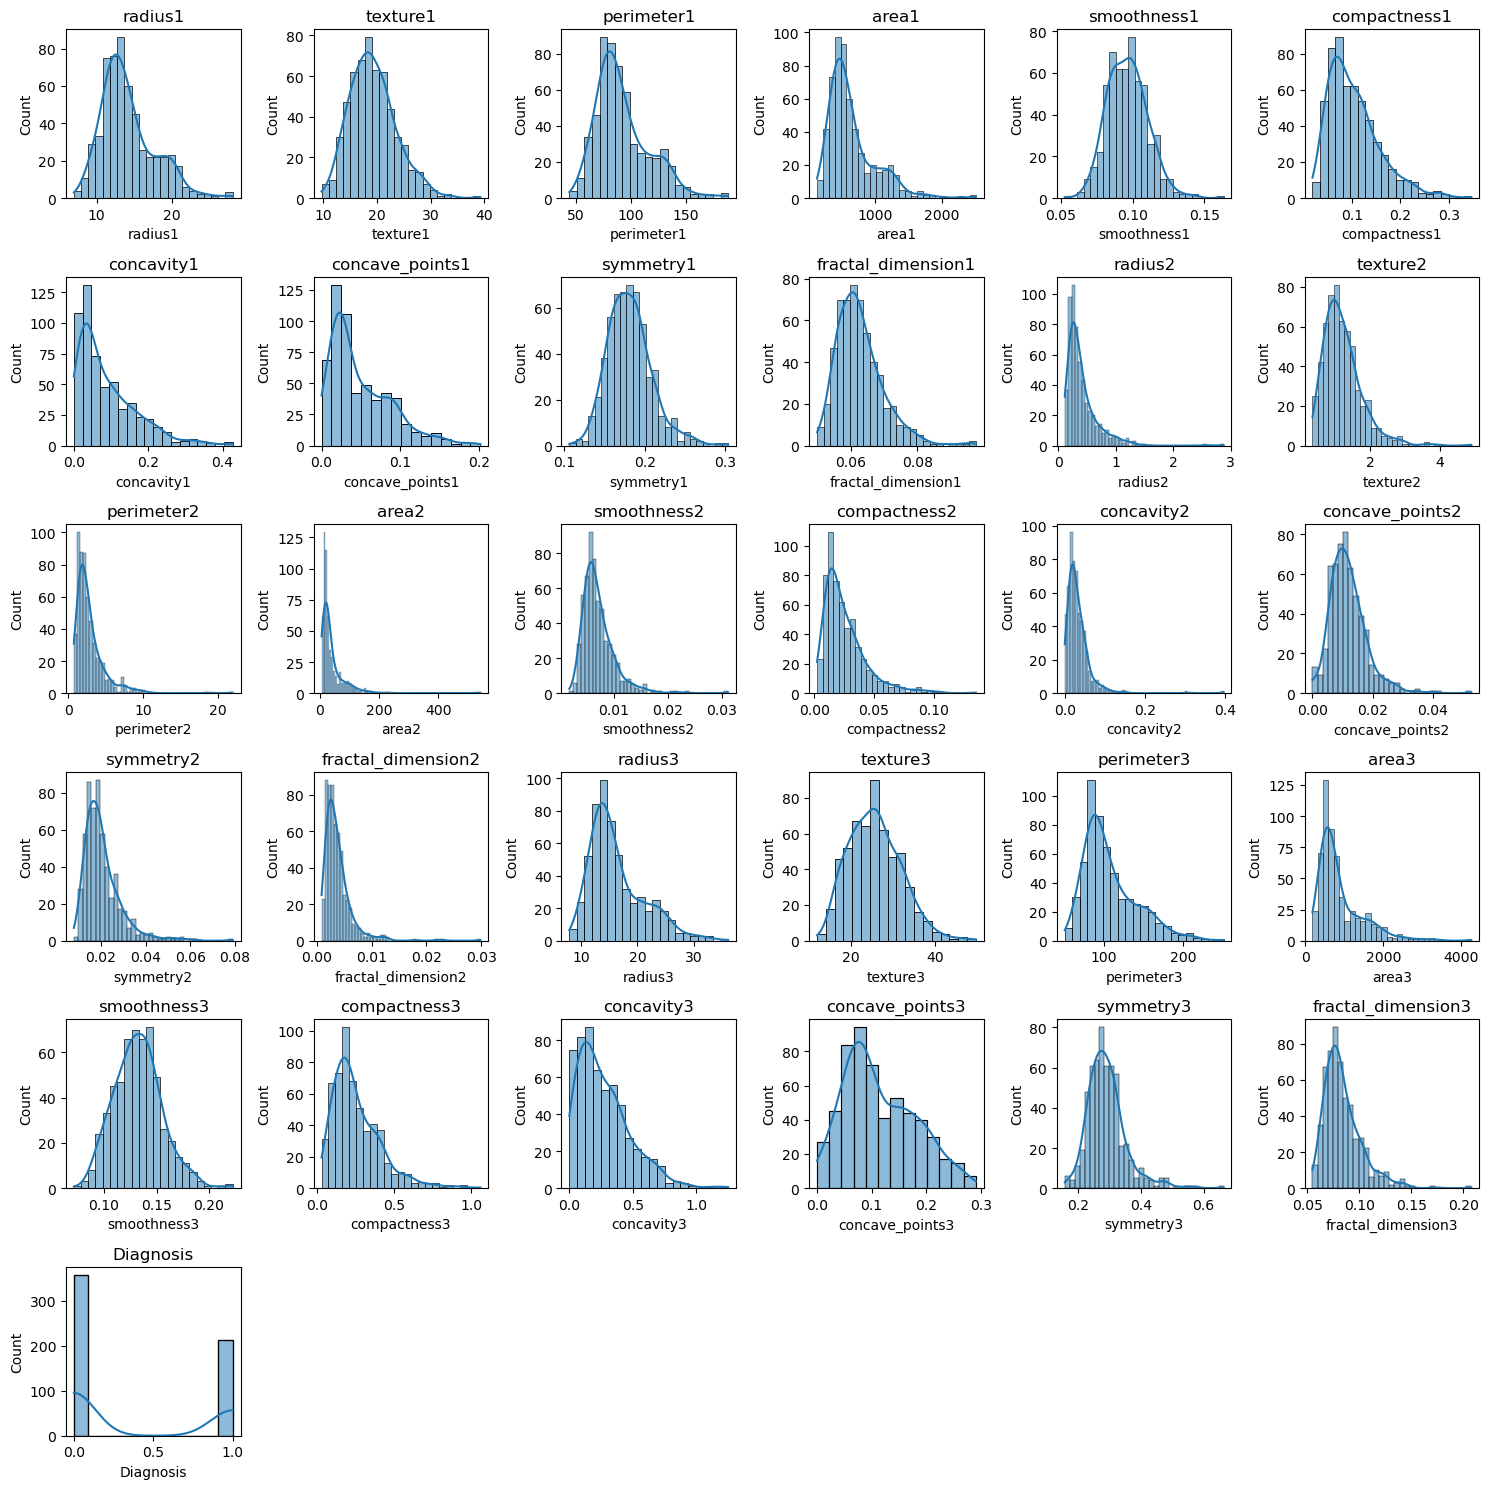

In [52]:
plt.figure(figsize=(15,15))
for i,cols in enumerate(df.columns,1):
    plt.subplot(6, 6, i)
    sns.histplot(df[cols],kde=True,fill=True)
    plt.title(cols)
plt.tight_layout()
plt.show()

In [53]:
import numpy as np
df_log = df.copy()
numeric_cols = df_log.select_dtypes(include=[np.number]).columns

df_log[numeric_cols] = df_log[numeric_cols].apply(np.log1p)

# Check skewness after transformation
print(df_log.skew(numeric_only=True))


radius1               0.348744
texture1              0.018733
perimeter1            0.328800
area1                 0.287328
smoothness1           0.406548
compactness1          1.043195
concavity1            1.206982
concave_points1       1.083180
symmetry1             0.632718
fractal_dimension1    1.272294
radius2               1.713417
texture2              0.629526
perimeter2            1.025375
area2                 0.847298
smoothness2           2.283394
compactness2          1.816278
concavity2            4.231738
concave_points2       1.399869
symmetry2             2.135874
fractal_dimension2    3.874373
radius3               0.506347
texture3             -0.101178
perimeter3            0.462758
area3                 0.457614
smoothness3           0.346313
compactness3          1.048729
concavity3            0.717939
concave_points3       0.386721
symmetry3             1.152984
fractal_dimension3    1.558559
Diagnosis             0.528461
dtype: float64


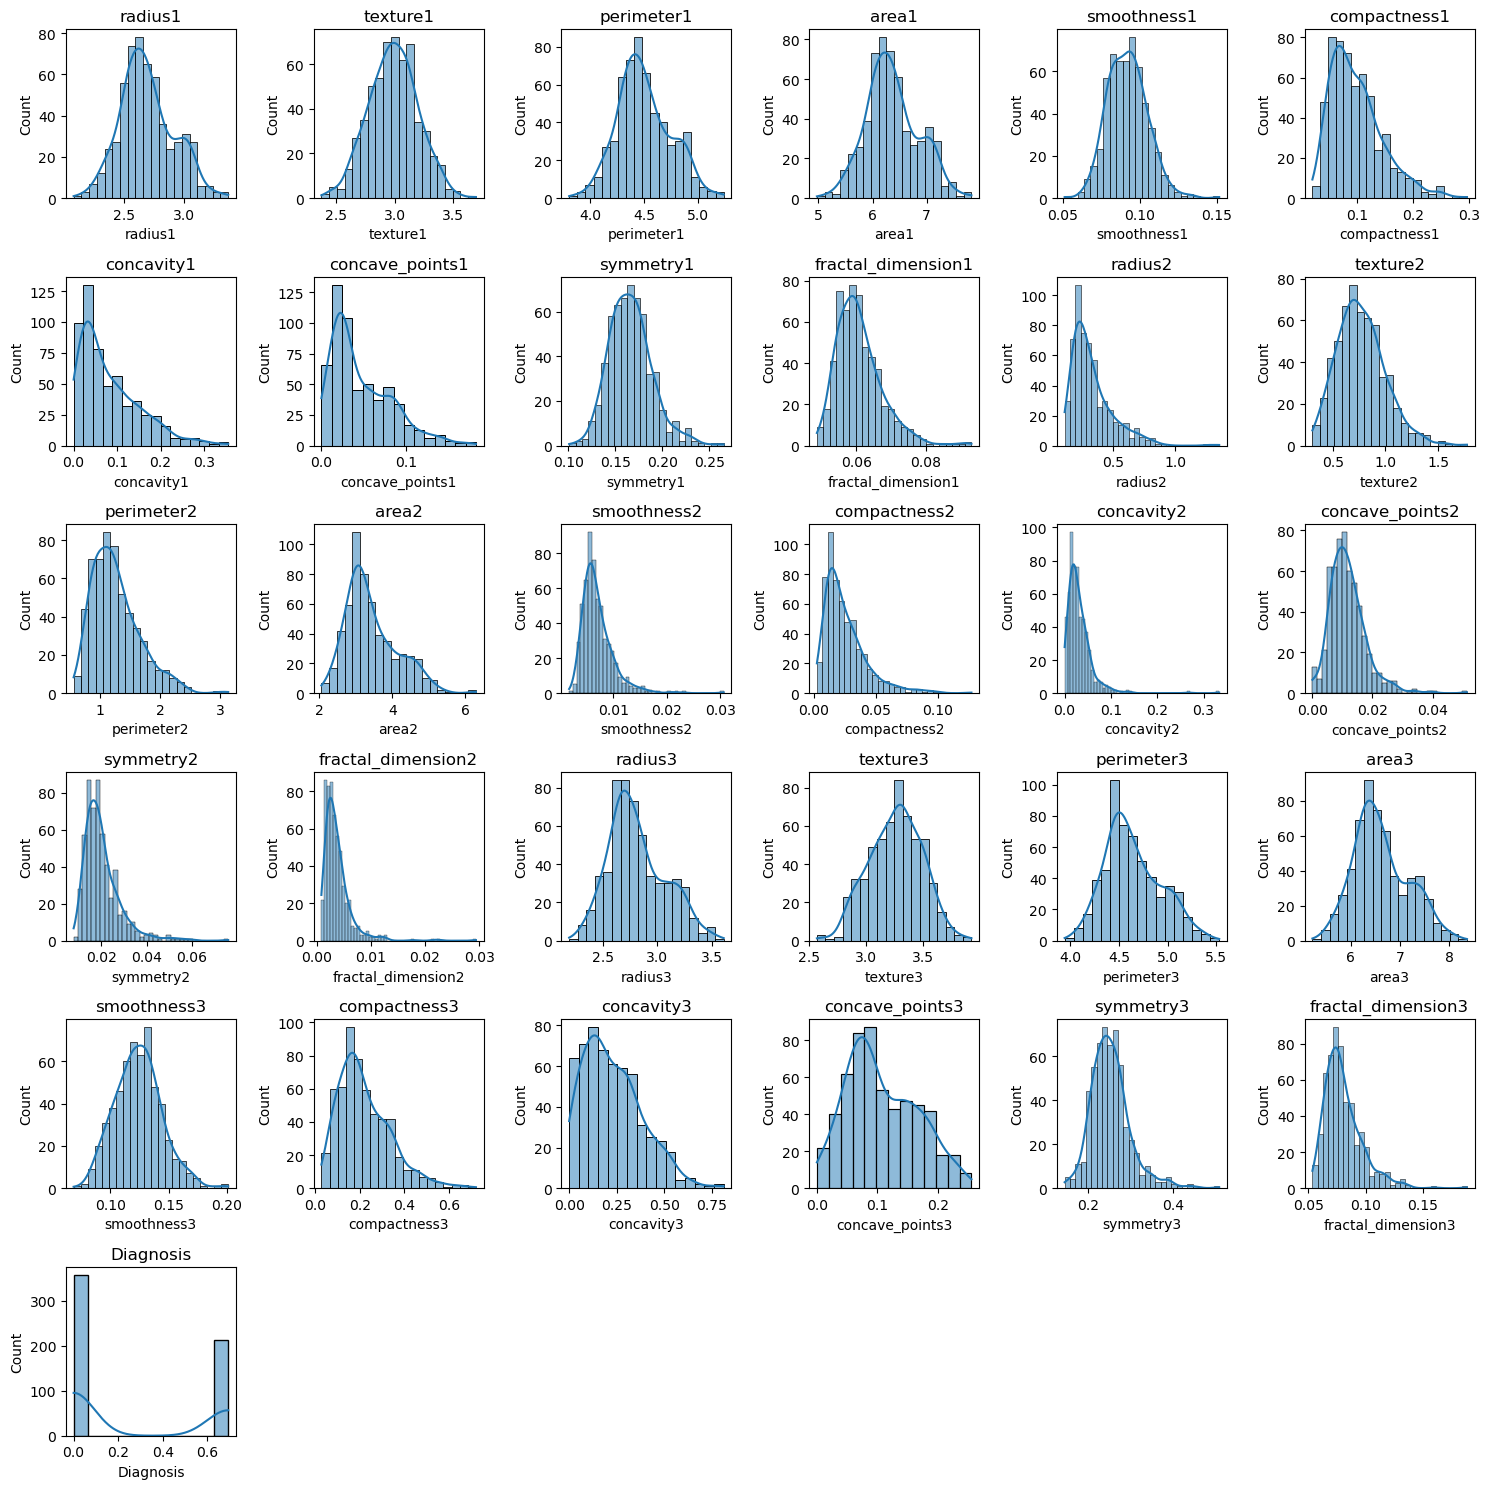

In [54]:
plt.figure(figsize=(15,15))
for i,cols in enumerate(df.columns,1):
    plt.subplot(6, 6, i)
    sns.histplot(df_log[cols],kde=True,fill=True)
    plt.title(cols)
plt.tight_layout()
plt.show()

In [55]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]  

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: >

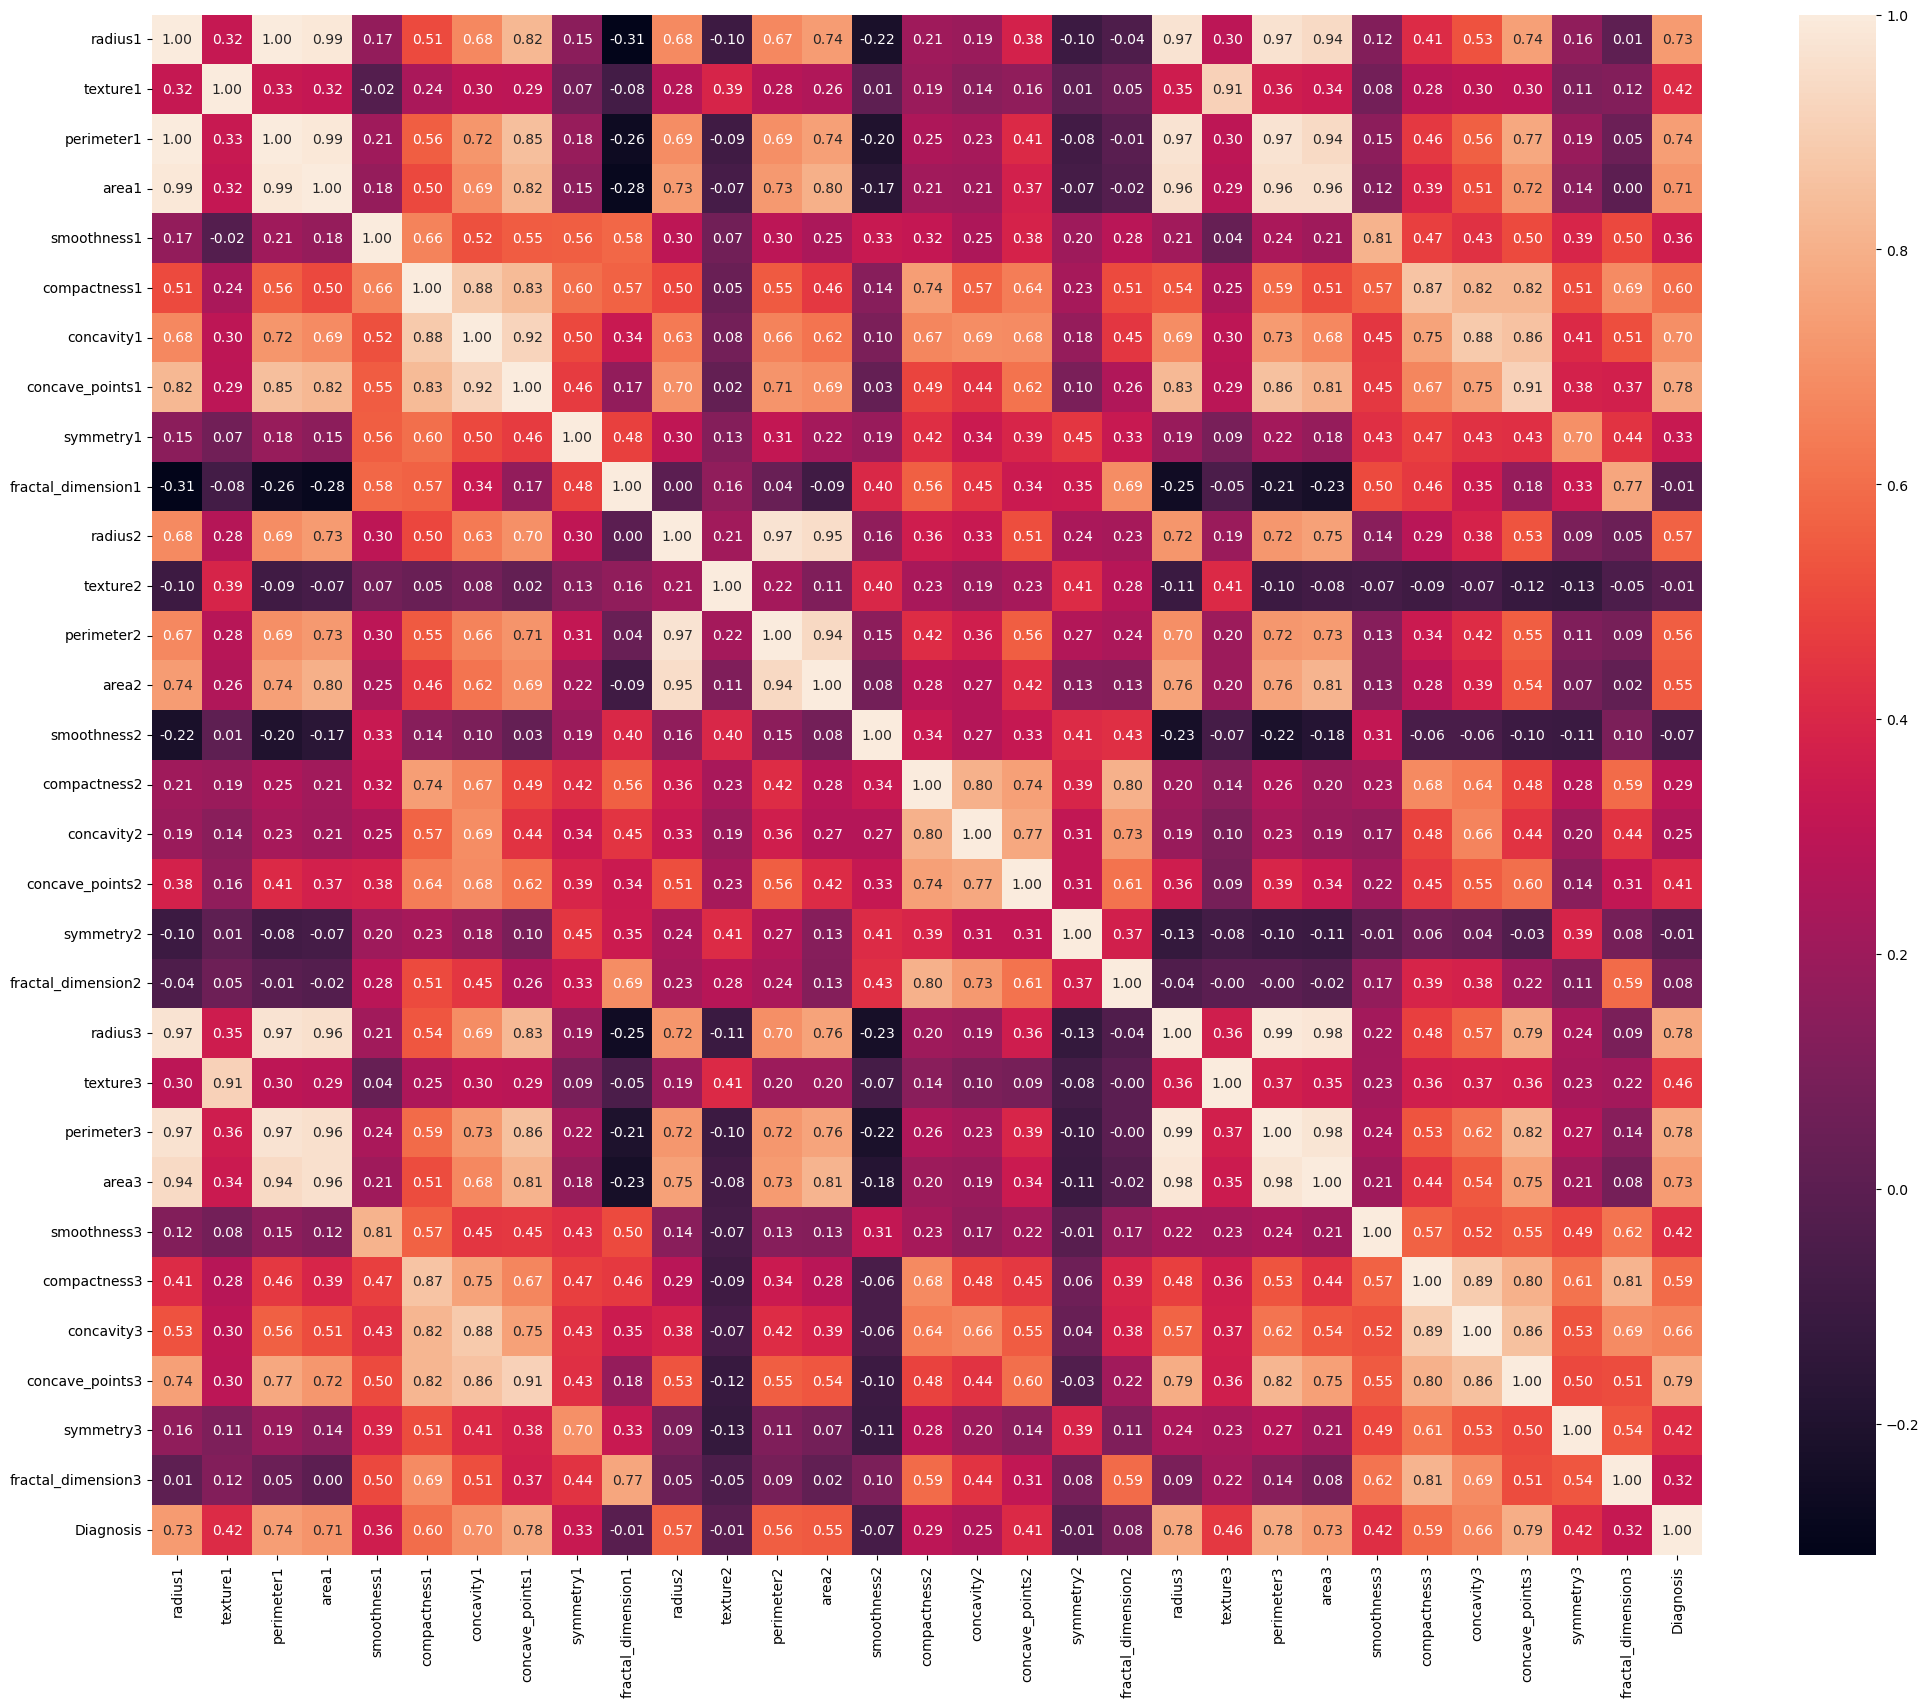

In [71]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),fmt=".2f",annot=True)

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

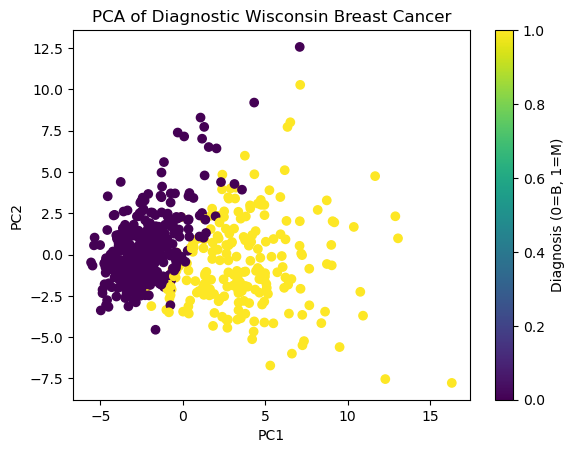

In [69]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Diagnostic Wisconsin Breast Cancer")
plt.colorbar(label="Diagnosis (0=B, 1=M)")
plt.show()